# Chapter 11
***

## Plotting and more about classes

__Line format from MATLAB__
- `b-` solid blue
- `ko` black circles

[Customizing plots with style sheets](https://matplotlib.org/users/style_sheets.html)

[Customizing matplotlib](https://matplotlib.org/users/customizing.html)

In [1]:
import pylab
import numpy as np
import pandas as pd

In [35]:
pd.DataFrame({'alias color': ['b','g','r','c','m','y','k','w'],
              'color':['blue','green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']})

,alias color,color
0,b,blue
1,g,green
2,r,red
3,c,cyan
4,m,magenta
5,y,yellow
6,k,black
7,w,white


In [34]:
pd.DataFrame({'alias style': ['-', '--', '-.', ':'],
              'linestyle': ['solid', 'dashed', 'dashdot', 'dotted']})

,alias style,linestyle
0,-,solid
1,--,dashed
2,-.,dashdot
3,:,dotted


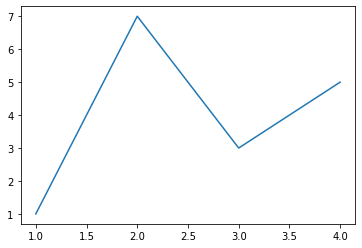

In [3]:
pylab.figure(1)
pylab.plot([1,2,3,4], [1,7,3,5]) # <x, y>
pylab.show()

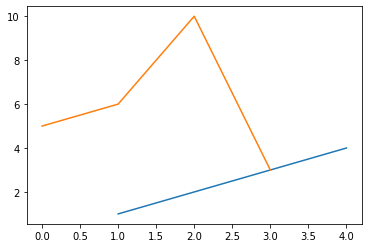

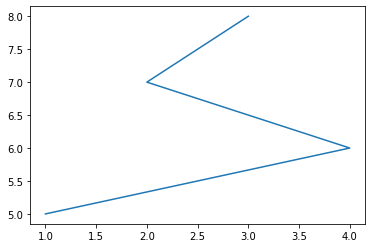

In [5]:
pylab.figure(1)
pylab.plot([1,2,3,4], [1,2,3,4])
pylab.figure(2)
pylab.plot([1,4,2,3], [5,6,7,8])
pylab.savefig('Figure-Addie')
pylab.figure(1)
pylab.plot([5,6,10,3]) # x is len(y) -> 0,1,2,3
pylab.savefig('Figure-Jane')

Text(0, 0.5, 'Value of Principal ($)')

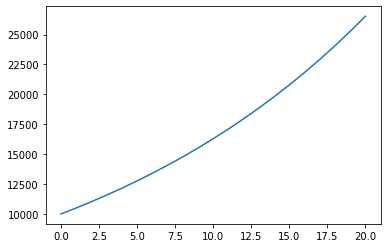

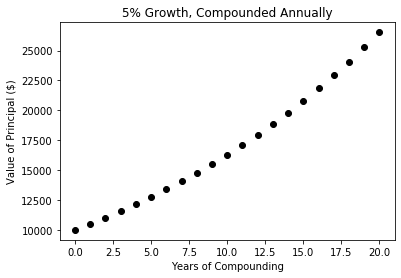

In [10]:
principal = 10000
interestRate = 0.05
years = 20
values = []
for i in range(years + 1):
    values.append(principal)
    principal += principal*interestRate
pylab.plot(values)
pylab.figure(2)
pylab.plot(values, 'ko')

pylab.title('5% Growth, Compounded Annually')
pylab.xlabel('Years of Compounding')
pylab.ylabel('Value of Principal ($)')

Text(0, 0.5, 'Value of Principal ($)')

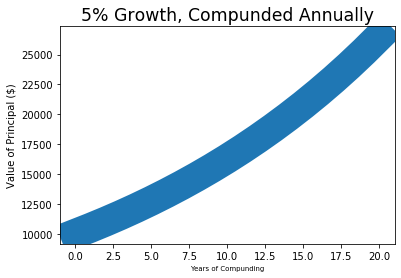

In [37]:
principal = 10000
interestRate = 0.05
years = 20
values = []
for i in range(years + 1):
    values.append(principal)
    principal += principal*interestRate
pylab.plot(values, lineWidth = 30)
pylab.title('5% Growth, Compunded Annually',
            fontsize = 'xx-large')
pylab.xlabel('Years of Compunding', fontsize = 'x-small')
pylab.ylabel('Value of Principal ($)')

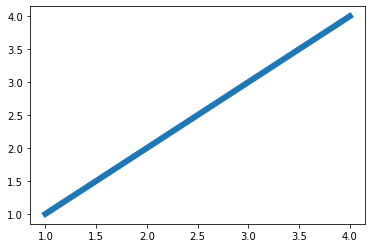

In [41]:
pylab.rcParams['lines.linewidth'] = 6
pylab.figure(1)
pylab.plot([1,2,3,4], [1,2,3,4])

In [42]:
# line width
pylab.rcParams['lines.linewidth'] = 4
# title size
pylab.rcParams['axes.titlesize'] = 20
# axis labels size
pylab.rcParams['axes.labelsize'] = 20
# numbers size on x axis
pylab.rcParams['xtick.labelsize'] = 16
# numbers size on y axis
pylab.rcParams['ytick.labelsize'] = 16
# size of x ticks
pylab.rcParams['xtick.major.size'] = 7
# size of y ticks
pylab.rcParams['ytick.major.size'] = 7
# size of markers
pylab.rcParams['lines.markersize'] = 10
# times a marker is displayed on the legend
pylab.rcParams['legend.numpoints'] = 1

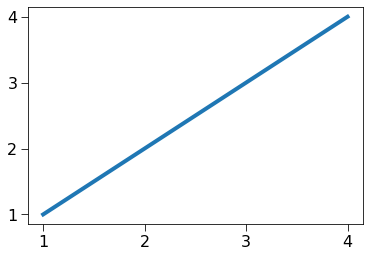

In [44]:
pylab.figure(1)
pylab.plot([1,2,3,4], [1,2,3,4])

In [48]:
a1 = pylab.array([1,2,4])
print('a1 =', a1)
a2 = a1*2
print('a2 =', a2)
print('a1 + 3 =', a1 + 3)
print('3 - a1 =', 3 - a1)
print('a1 - a2 =', a1 - a2)
print('a1*a2 =', a1*a2)

a1 = [1 2 4]
a2 = [2 4 8]
a1 + 3 = [4 5 7]
3 - a1 = [ 2  1 -1]
a1 - a2 = [-1 -2 -4]
a1*a2 = [ 2  8 32]


In [8]:
def findPayment(loan, r, m):
    return loan*((r*(1+r)**m)/((1+r)**m - 1))

In [10]:
class Mortgage(object):
    """Abstract class for building different kinds of mortgages"""
    def __init__(self, loan, annRate, months):
        self.loan = loan
        self.rate = annRate/12.
        self.months = months
        self.paid = [0.0]
        self.outstanding = [loan]
        self.payment = findPayment(loan, self.rate, months)
        self.legend = None # mortgage description
    
    def makePayment(self):
        self.paid.append(self.payment)
        reduction = self.payment - self.outstanding[-1]*self.rate
        self.outstanding.append(self.outstanding[-1] - reduction)
        
    def getTotalPaid(self):
        return sum(self.paid)
    def __str__(self):
        return self.legend
    
    def plotPayments(self, style):
        pylab.plot(self.paid[1:], style, label = self.legend)
        
    def plotBalance(self, style):
        pylab.plot(self.outstanding, style, label = self.legend)
    
    def plotTotPd(self, style):
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd.append(totPd[-1] + self.paid[i])
        pylab.plot(totPd, style, label=self.legend)
    
    def plotNet(self, style):
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd.append(totPd[-1] + self.paid[i])
        equityAcquired = pylab.array([self.loan] *\
                                     len(self.outstanding))
        equityAcquired = equityAcquired - \
                         pylab.array(self.outstanding)
        net = pylab.array(totPd) - equityAcquired
        pylab.plot(net, style, label = self.legend)

In [11]:
class Fixed(Mortgage):
    def __init__(self, loan, r, months):
        Mortgage.__init__(self, loan, r, months)
        self.legend = 'Fixed, ' + str(r*100) + '%'
    
class FixedWithPts(Mortgage):
    def __init__(self, loan, r, months, pts):
        Mortgage.__init__(self, loan, r, months)
        self.pts = pts
        self.paid = [loan*(pts/100.)]
        self.legend = 'Fixed, ' + str(r*100) +'%, '\
                    + str(pts) + ' points'

class TwoRate(Mortgage):
    def __init__(self, loan, r, months, teaserRate, teaserMonths):
        Mortgage.__init__(self, loan, teaserRate, months)
        self.teaserMonths = teaserMonths
        self.teaserRate = teaserRate
        self.nextRate = r/12.
        self.legend = str(teaserRate*100) \
                    + '% for ' + str(self.teaserMonths) \
                    + ' months, then ' + str(r*100) + '%'
    
    def makePayment(self):
        if len(self.paid) == self.teaserMonths + 1:
            self.rate = self.nextRate
            self.payment = findPayment(self.outstanding[-1],
                                       self.rate,
                                       self.months - self.teaserMonths)
        Mortgage.makePayment(self)

In [12]:
def compareMortgages(amt, years, fixedRate, pts, ptsRate,
                     varRate1, varRate2, varMonths):
    totMonths = years*12
    fixed1 = Fixed(amt, fixedRate, totMonths)
    fixed2 = FixedWithPts(amt, ptsRate, totMonths, pts)
    twoRate = TwoRate(amt, varRate2, totMonths, varRate1, varMonths)
    morts = [fixed1, fixed2, twoRate]
    for m in range(totMonths):
        for mort in morts:
            mort.makePayment()
    plotMortgages(morts, amt)

In [15]:
def plotMortgages(morts, amt):
    def labelPlot(figure, title, xlabel, ylabel):
        pylab.figure(figure)
        pylab.title(title)
        pylab.xlabel(xlabel)
        pylab.ylabel(ylabel)
        pylab.legend(loc = 'best')
    styles = ['b-', 'g-.', 'r:']
    # gives names to figure numbers
    payments, cost, balance, netCost = 0, 1, 2, 3
    for i in range(len(morts)):
        pylab.figure(payments)
        morts[i].plotPayments(styles[i])
        pylab.figure(cost)
        morts[i].plotTotPd(styles[i])
        pylab.figure(balance)
        morts[i].plotBalance(styles[i])
        pylab.figure(netCost)
        morts[i].plotNet(styles[i])
    labelPlot(payments, 'Monthly Payments of $' + str(amt) +
              ' Mortgages', 'Months', 'Monthly Payments')
    labelPlot(cost, 'Cash Outlay of $' + str(amt) +
             ' Mortgages', 'Months', 'Total Payments')
    labelPlot(balance, 'Balance Remaining of $' + str(amt) +
             ' Mortgages', 'Months', 'Remaining Loan Balance f $')
    labelPlot(netCost, 'Net Cost of $' + str(amt) + ' Mortgages',
             'Months', 'Payment - Equity $')

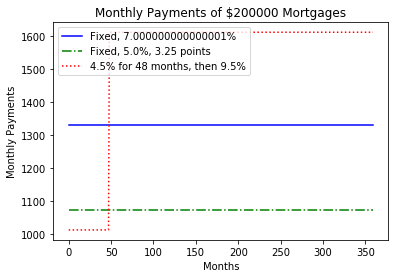

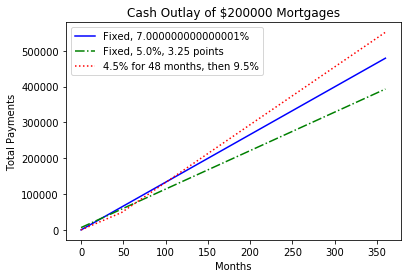

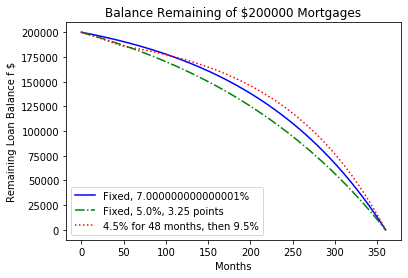

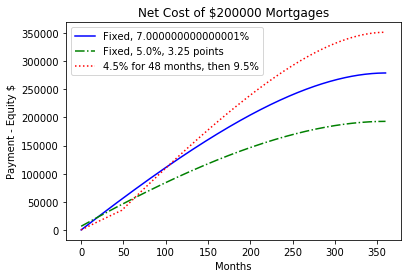

In [16]:
compareMortgages(amt=200000, years=30, fixedRate=0.07,
                 pts=3.25, ptsRate=0.05,
                 varRate1=0.045, varRate2=0.095, varMonths=48)